# 灰度图、亮度图（Gray Image）

在数字图像中，一张图片是不同的像素的组合。如果用矩阵来表示，就是一个二维的数组，或者说矩阵。每一个元素可以是一个包含3个元素的向量 {R，G，B}向量矩阵，或者仅一个元素的 {Gray} 的元素矩阵。

![在这里插入图片描述](https://img-blog.csdnimg.cn/2020112323385583.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)
为了更好的研究各类算法，我们常用灰度图作为研究对象。上图中使用的是林肯的照片，如果研究这张照片的原始数据，会发现它其实是这样一个 $W \times H$ 的元素矩阵，每个元素都是一个范围在 $[0, 255]$的整数。

用数学矩阵进行表示的话，大概就是这个样子：

$$
I = \begin{bmatrix}
10 & 15 & 55 & 145 & ... \\ 
15 & 10 & 10 & 55 & ... \\ 
1 & 12 & 10 & 145 & ... \\ 
90 & 180 & 0 & 125 & ... \\
... & ... & ... &... & ... 
\end{bmatrix}
$$

当前主流的图像是8比特位的，所以也解释了为什么大多数PNG、JPG、BMP的格式的图片，图像数据范围都是在 $[0, 255]$ 的原因。

# 彩色图转灰度图

将彩色图片转换为灰度图片（亮度图片），经常是数字图像处理中常用到重要一部，转换方法有多种多样，比如在之前文章里提到的HSV等颜色空间中的转换方法，不过在这里我仅提一些在RGB色域空间中常用到的方法。

尽管以下方法，已经有前人实现了相关函数，并广泛存在于各种图形图像函数库中，但我依然希望你能明白理解这些是怎么计算的。

## 一般亮度转换（luminosity method）

$$Gray(x) = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$$

这是一种权重转换，对于每个像素，分别对应其RGB色道上的数据，乘以对应的权重，例如$(0.299, 0.587, 0.114)$，这一类权重，通常在G色道上保留较大的权重，而对于R、B色道上保留较小权重。保留较多的G色道，主要因为在G色道上能保有较多的数据，且人眼对于黄、绿、青的光更为敏感。

在人眼可感知的可见光波的 400nm - 700nm这样一个范围里，绿色、黄色、青色处于可见光光带中央，具备最大的颜色覆盖度，也就是最大的亮度覆盖范围，所以无论哪一种权重转换，都需要尽最大可能保留绿色、黄色、青色的占比权重。

因此对于RGB三原色来说，保留最多的绿色，和适量的红色和蓝色，可以近似的模拟出我们对于光通量的感受情况。如果有需要知道更多细节，可以看看这篇文章[《为你更新色彩观: 直观理解光谱和颜色》](https://zhuanlan.zhihu.com/p/36249402)

![在这里插入图片描述](https://img-blog.csdnimg.cn/20201124140822273.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)

Text(0.5, 1.0, 'Gray Image')

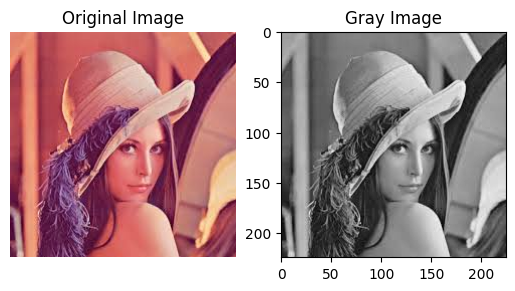

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def rgb_2_gray_normal(rgb_file: str):
    image = cv2.imread(rgb_file)
    row, col, channel = image.shape
    image_gray = np.zeros((row, col))
    for r in range(row):
        for l in range(col):
            # convert rgb image to gray image
            # gray = 0.299⋅R + 0.587⋅G + 0.114⋅B
            image_gray[r, l] =  0.114 * image[r, l, 0] + \
                                0.587 * image[r, l, 1] + \
                                0.299 * image[r, l, 2]

    return image_gray, image


# Read the image and convert it to gray
gray_image, image = rgb_2_gray_normal('/opt/images/lena.png')

# Show the original image and the gray image
plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

## 亮度优先转换（luminosity priority）

$$Gray(X) = \frac{max(R,G,B) + min(R, G, B)}{2}$$


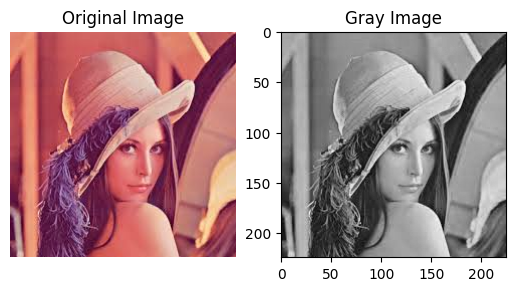

In [3]:
def rgb_2_gray_brightness(rgb_file: str):
    image = cv2.imread(rgb_file)
    row, col, channel = image.shape
    image_gray = np.zeros((row, col))

    for r in range(row):
        for l in range(col):
            image_gray[r, l] = 0.5 * max(image[r, l, 0], image[r, l, 1], image[r, l, 2]) +\
                               0.5 * min(image[r, l, 0], image[r, l, 1], image[r, l, 2])

    return image_gray, image


# Read the image and convert it to gray
gray_image, image = rgb_2_gray_brightness('/opt/images/lena.png')

# Show the original image and the gray image
plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

plt.show()


## 最小亮度转换（minimum luminosity）

$$Gray(X) = min(R, G, B)$$

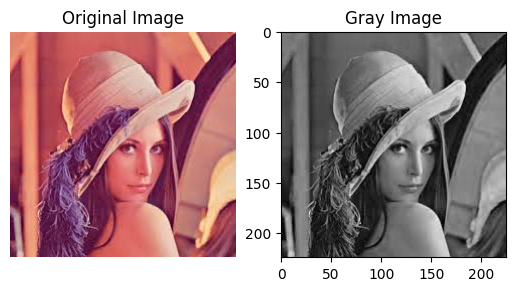

In [6]:
def rgb_2_gray_min(rgb_file: str):
    image = cv2.imread(rgb_file)
    row, col, channel = image.shape
    image_gray = np.zeros((row, col))

    for r in range(row):
        for l in range(col):
            image_gray[r, l] = min(image[r, l, 0], image[r, l, 1], image[r, l, 2])

    return image_gray


# Read the image and convert it to gray
gray_image = rgb_2_gray_min('/opt/images/lena.png')

# Show the original image and the gray image
plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

plt.show()



## 最大亮度转换（maximum luminosity）

$$Gray(X) = max(R, G, B)$$

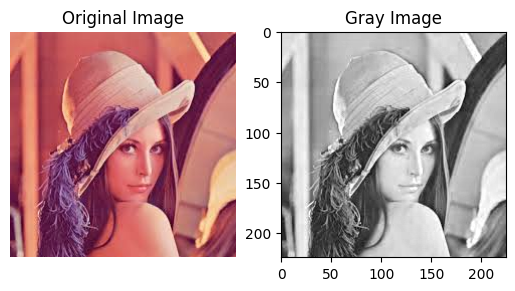

In [7]:
def rgb_2_gray_max(rgb_file: str):
    image = cv2.imread(rgb_file)
    row, col, channel = image.shape
    image_gray = np.zeros((row, col))

    for r in range(row):
        for l in range(col):
            image_gray[r, l] = max(image[r, l, 0], image[r, l, 1], image[r, l, 2])

    return image_gray

# Read the image and convert it to gray
gray_image = rgb_2_gray_max('/opt/images/lena.png')

# Show the original image and the gray image
plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

plt.show()

## 效果对比

我们把输出效果进行对比：

![在这里插入图片描述](https://img-blog.csdnimg.cn/20201126200302383.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3BvaXNvbmNocnk=,size_16,color_FFFFFF,t_70#pic_center)
相对的来说，采用权重法表现要更柔和一些，当然使用哪一种方法，纯粹依据具体情况来定。例如对于原图本身亮度欠佳的，采用最大亮度的方式会更合适，但对于本来已经光污染的图片来说，也许用最小亮度会更合适一些。

除了这些线性的方式，也有一些采用二次采样曲线的转换方法，以及转换颜色空间到HSV，以纯粹亮度进行输出的方法，这里就不做更多的赘述了。有兴趣的朋友可以自行查找相关资料，做做实验看一看。

## 二值化
除了灰度图以外，还有另外一类只有黑白的所谓二值化的颜色转换方法。“二值化”，也被称为黑白图像，它的颜色状态只有黑和白两种。也是一种比较常见的图像。它之所以能够存在，其一是压缩后的数据体量更小，便于网络传输，其二是在一些传统的新闻出版行业，可以节省印刷成本。当然，缺点也是有的，就是图片经过二值化后，会丢失很多细节。

比如这样的一个函数，可以当作二值化的处理函数：

$$
Black(Y) = \left\{\begin{matrix}
255 & X > 90 \\ 
0 & otherwise
\end{matrix}\right.
$$

这里的X表示的是阈值，你可以简单的给定一个常数，比如100，也可以配合灰度直方图，动态的进行调整，以达到最大化保存图片细节的目的。

当然我们也可以使用比如图像抖动的方法，为二值化图像增加足够多的细节，不过这些内容会在我后面的文章里提到，这里就不做过多的补充了。

简单的代码实现方法：

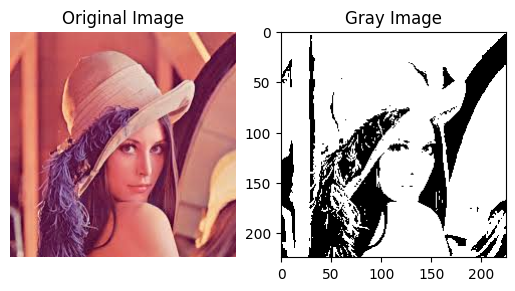

In [8]:
def rgb_2_black(rgb_file: str):
    image = cv2.imread(rgb_file)
    row, col, channel = image.shape
    image_gray = np.zeros((row, col))

    for r in range(row):
        for l in range(col):
            # first of all, convert rgb image to gray
            X = 0.114 * image[r, l, 0] + 0.587 * image[r, l, 1] + 0.299 * image[r, l, 2]

            if X > 90:
                image_gray[r, l] = 255
            else:
                image_gray[r, l] = 0

    return image_gray


# Read the image and convert it to gray
gray_image = rgb_2_black('/opt/images/lena.png')

# Show the original image and the gray image
plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

plt.show()